<a href="https://colab.research.google.com/github/Kushan1001/Hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis(Compiled).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up

In [1]:
# Importing the libs

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6

# set some display options:

pd.set_option("display.max_columns", 36)
plt.style.use('ggplot')


In [3]:
hotel_df = pd.read_csv('Hotel Bookings.csv')

In [13]:
# getting a glance of the pandas dataframe
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Data Cleaning**

In [14]:
# checking percentage of null values in the dataframe
hotel_df.isnull().sum()/len(hotel_df)*100

hotel                             0.00000
is_canceled                       0.00000
lead_time                         0.00000
arrival_date_year                 0.00000
arrival_date_month                0.00000
arrival_date_week_number          0.00000
arrival_date_day_of_month         0.00000
stays_in_weekend_nights           0.00000
stays_in_week_nights              0.00000
adults                            0.00000
children                          0.00335
babies                            0.00000
meal                              0.00000
country                           0.00000
market_segment                    0.00000
distribution_channel              0.00000
is_repeated_guest                 0.00000
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
reserved_room_type                0.00000
assigned_room_type                0.00000
booking_changes                   0.00000
deposit_type                      0.00000
days_in_waiting_list              

In [7]:
# Dropping agent and company's columns as there are high percentage of null values
hotel_df.drop(columns=['company','agent'],inplace = True)

In [8]:
# getting sum of null values of the country's column
hotel_df['country'].isnull().sum()

488

In [9]:
# getting mode of the coutry's column
hotel_df['country'].mode()

0    PRT
dtype: object

In [10]:
# filling NA values of the country's column with mode of the data
hotel_df['country'] = hotel_df['country'].fillna('PRT')

In [11]:
#getting statistics of the data 
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


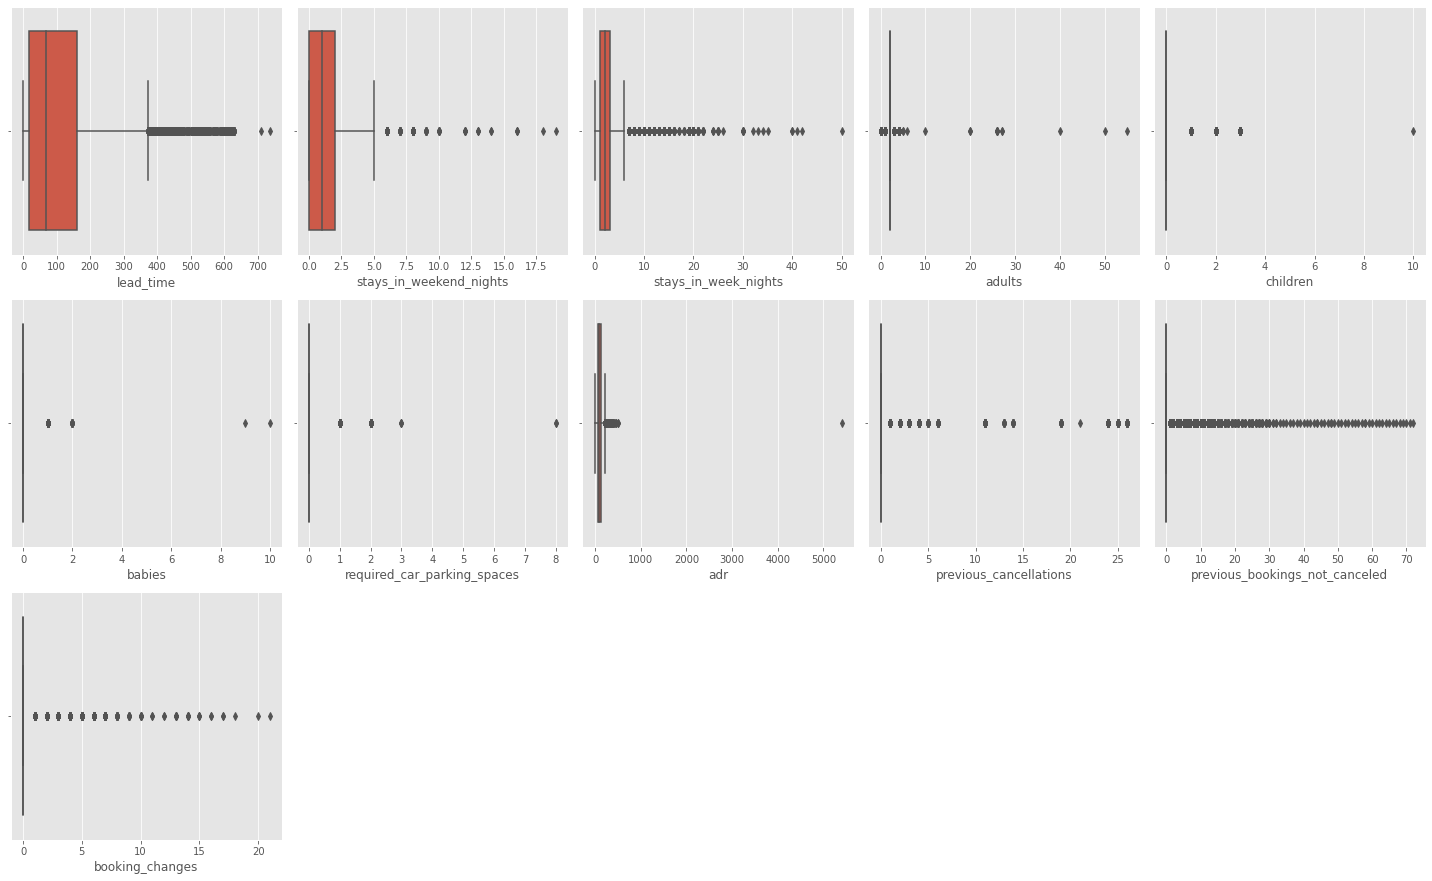

In [15]:
# checking for ouliers
list_of_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize = (20,20))

for elem in list_of_columns:
  plt.subplot(5,5,n)
  n = n+1
  sns.boxplot(hotel_df[elem])
  plt.tight_layout()

In [16]:
#removing outliers based on conditional filtering
hotel_df = hotel_df.loc[hotel_df['lead_time'] < hotel_df['lead_time'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_weekend_nights'] < hotel_df['stays_in_weekend_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_week_nights'] < hotel_df['stays_in_week_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['adults'] < 4]
hotel_df = hotel_df.loc[hotel_df['children'] < 5]
hotel_df = hotel_df.loc[hotel_df['babies'] < 4]
hotel_df = hotel_df.loc[hotel_df['required_car_parking_spaces'] < 5]
hotel_df = hotel_df.loc[hotel_df['adr'] < 1000]


### **Now our data looks clean. Let's start with  data visualisation.**

### **Which group of adults(with children/without children) have the most speical requests**

> Indented block



In [69]:
#creating a new column of adults with children to check weather adults prefer to travel solo or with children/babies 

def do_adults_travel_with_family(col_1,col_2):
  ''' takes argument as children and babies 
      and compares it with adults and returns
      1 for if they any children/babies and 0 
      for if they don't have any'''
  if col_1 or col_2 != 0:
    return ('with children')
  else:
    return ('without children')

hotel_df['adults_with_children'] = hotel_df.apply(lambda x: do_adults_travel_with_family(x['children'],x['babies']),axis = 1)

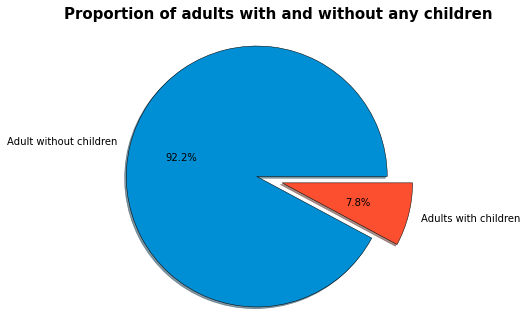

<Figure size 1440x1440 with 0 Axes>

In [70]:
# visualising proportion of adults with and without any children

explode = [0.0,0.3]
labels = ['Adult without children','Adults with children']
colors = ['#008fd5','#fc4f30']

plt.pie(hotel_df['adults_with_children'].value_counts(), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = explode, labels = labels, colors = colors,radius = 1.5, shadow = 'True')

plt.title('Proportion of adults with and without any children', fontweight = 'bold', fontsize = 15 ,x = 0.6, y = 1.2)

plt.figure(figsize = (20,20))

plt.tight_layout()

Text(0, 0.5, 'Number of special requests')

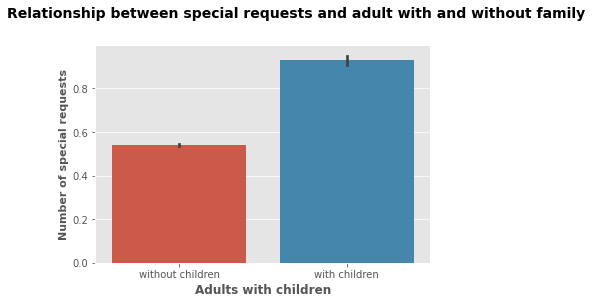

In [72]:
#checking which group of adults has the more speical requests

bar_chart = (sns.barplot(data = hotel_df, x = 'adults_with_children', y = 'total_of_special_requests')
            .set_title('Relationship between special requests and adult with and without family', fontweight = 'bold' ,size = 14, x= 0.6, y= 1.1))

plt.xlabel('Adults with children', fontweight = 'bold', size = 12)
plt.ylabel('Number of special requests', fontweight = 'bold', size = 11)


In [74]:
#It is evident from the piechart that almost 90% of adults prefer to travel without any children and only 10% of adults prefer 
#to travel with family. Moreover, adults who travel without any children have the most special requests.

### **Cancellations over the different months**

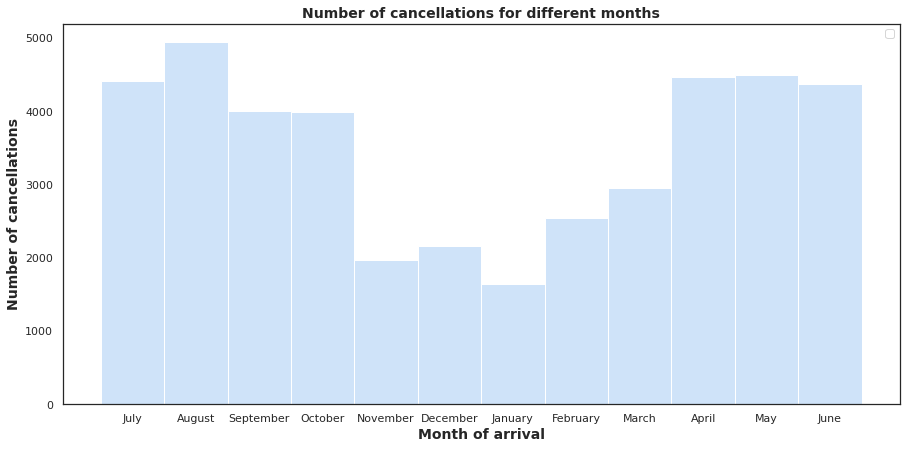

In [127]:
#number of cancellations for different months

no_of_cancellations = hotel_df.loc[hotel_df['is_canceled'] == 1, :]

sns.set(style = 'white')

plt.figure(figsize = (15,7))
histogram_plot = sns.histplot(data = no_of_cancellations , x = 'arrival_date_month', hue = 'is_canceled' , palette = 'pastel')

plt.title('Number of cancellations for different months', fontweight = 'bold',size = 14)
plt.xlabel('Month of arrival',size = 14, fontweight = 'bold')
plt.ylabel('Number of cancellations',size = 14 , fontweight = 'bold')

plt.legend([])

### **Insights**

1.   Over the year, summer months(April-August) experienced the highest number of cancellations 
2.   However, the winter months(November-January) had the least cancellations







### **Are cancellation rates related with the lead time?**

Text(0.5, 0, 'Hotel Types')

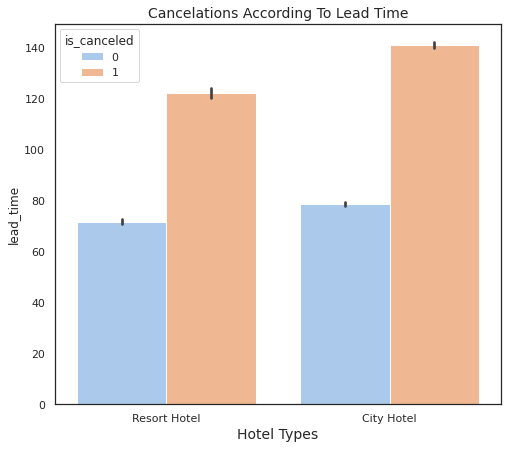

In [115]:
# connection between lead time and number of cancellations

plt.figure(figsize = (8,7))

cancelations_according_to_lead_time = hotel_df.loc[ : , ['hotel','is_canceled','lead_time']]

sns.barplot(data = cancelations_according_to_lead_time, x = 'hotel', y = 'lead_time', hue = 'is_canceled', palette= 'pastel').set_title('Cancelations According To Lead Time', size = 14)
plt.xlabel('Hotel Types', size = 14)

### **Insights**

1.   It can be seen from the graph that irrespective of the hotel type customer generally cancel their bookings with high lead time.
2.  Moreover, it also become evident that if the lead time crosses 80-82 days then, the customer is bound to cancel their booking.



### **Relationship between deposit type and cancellations**

Text(0.5, 1.0, 'Relationship between deposit types and cancellation rates')

<Figure size 1080x1080 with 0 Axes>

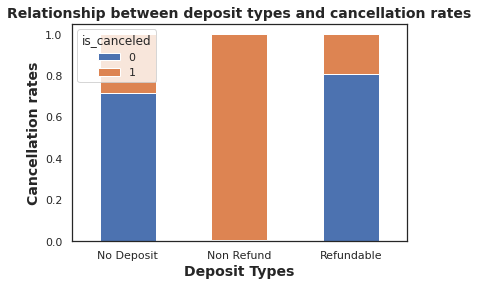

In [129]:
plt.figure(figsize = (15,15))

deposit_cancelltion_barplot = hotel_df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack('is_canceled').plot.bar(stacked=True)

plt.xlabel('Deposit Types', size = 14, fontweight = 'bold')
plt.ylabel('Cancellation rates', size = 14, fontweight = 'bold')
plt.xticks(rotation = 360)

plt.title('Relationship between deposit types and cancellation rates', size = 14, fontweight = 'bold')


**Insights**

1.   First of all, customers who have paid non-refundable deposit, most of them are bound their booking.
2.   Secondly, customers have paid either no deposit or refundable deposit are likely to not cancel their booking as comapared to customers who have paid non-refundable deposit.




### **ADR over the months**

Text(0, 0.5, 'ADR')

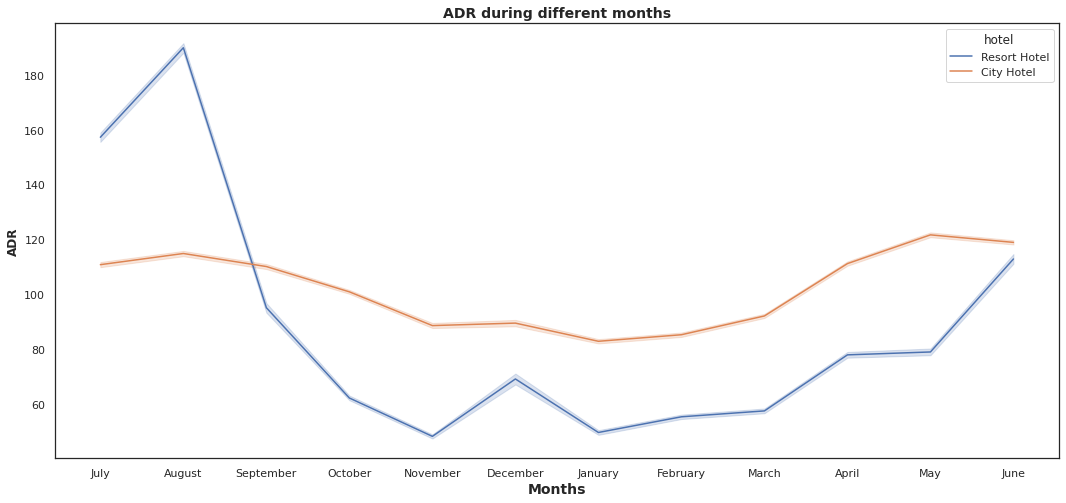

In [133]:
plt.figure(figsize = (18,8))

sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title('ADR during different months', size = 14,fontweight = 'bold')
plt.xlabel('Months', size = 14, fontweight = 'bold')
plt.ylabel('ADR', fontweight = 'bold')

### **Insights**

1.   ADR was the resort hotel was at its peak during the summer months(May-August) and bottom in months of October-Janaury
2.   On the other hand, for the city hotel ADR was relatively same in all the months and followed the same pattern as the resort hotel.



### **Most revenue generating hotel rooms and which customer group books them**

Text(0.5, 1.0, 'Relationship between ADR, room types and different customer groups')

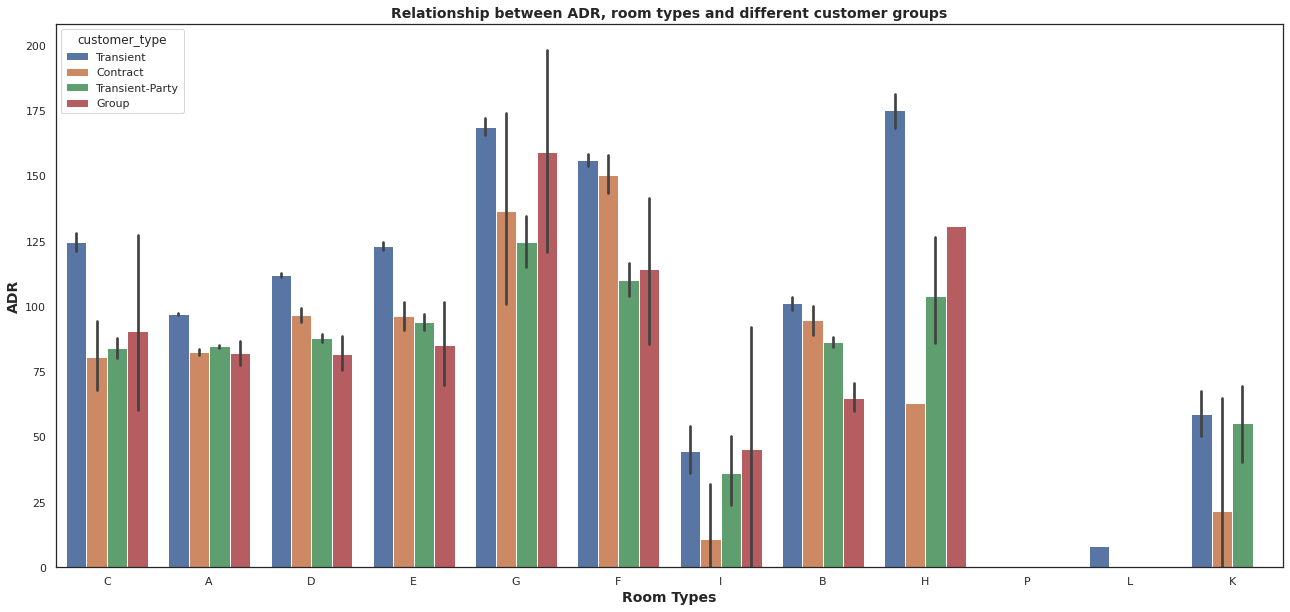

In [138]:
plt.figure(figsize = (22,10))

sns.barplot(data = hotel_df, y = 'adr', x = 'assigned_room_type', hue = 'customer_type')

plt.xlabel('Room Types', fontweight = 'bold', size = 14)
plt.ylabel('ADR',fontweight = 'bold', size = 14)
plt.title('Relationship between ADR, room types and different customer groups',fontweight = 'bold', size = 14)

### **Insights**

1.   It can be seen that, transient customers are the paying the most to stay in the hotel across all room types.
2.   Furthermore, rooms G,F and H are the most profitable rooms.



### **What are the top countries from which the customers visit**

In [ ]:
#Bar gra

### **What is the average lead time of different customer groups**

### **What are the most busiest months?**

### **Which market segment do customer prefer while booking hotel**

### **What are the prices of different room types over the months?**

### **What are the months with highest cancellations**

### **What is the duration of stay of different customer types**

### **What is the most popular meal plan**

In [ ]:
df = hotel_df[['meal','customer_type']]
df = df.groupby('meal')['customer_type'].value_counts().unstack()
df.drop(index=['Undefined'],inplace = True)

In [ ]:
group_df = df.Group

In [ ]:
plt.figure(figsize=(15,5))
group_df.plot(kind='bar')
plt.xlabel('Meal Type',size=20)
plt.ylabel('Count', size = 20)
plt.title("Preference Of Meal Type By Group Customer Type",size = 24)
plt.show()

### **Which type of deposit is preferred by customers**

### **Which month is preferred by different customer groups for their stay**

### **What are the months with the highest cancellation rates**

### **Which customer groups has the most special requests**

### **Do adults prefer to travel with children or without them**

### **And if they do they less special requests or more**

### **What is lead time after which customers generally cancel their booking**

### **What is the relationship between different types of deposit and cancellations**

### **What is ADR over the months. And in which months is the ADR at the peak and at the bottom**

### **Which room are generating the most revenue and which customer groups like to stay in them**